<h2><b><center>Gadgets360 Camera Market Analysis & Price Prediction</center><b></h2>

<h4><b>1: Problem Statement</b></h4>

The objective of this project is to analyze camera products data collected from Gadgets360
and understand pricing trends based on technical specifications and brand information.

The project also aims to:
1. Predict camera prices using machine learning (Regression)
2. Categorize cameras into Budget, Mid-range, and Premium segments (Classification)



<h4><b>2: Import Required Libraries</b></h4>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

<h4><b>3: Load Dataset</b></h4>

In [3]:
df = pd.read_csv("cameras.csv") 
df.head()


,url,Picture URL,Brand,Product Name,Model,Price in India,1 Stars,2 Stars,3 Stars,4 Stars,...,Display Resolution,Manual Exposure,Microphone,Other Focus Features,Viewfinder Coverage,Flash Compensation,Aperture Range,Viewfinder Magnification,Digital Zoom,other_info
0,https://gadgets.ndtv.com/panasonic-lumix-dc-gh...,https://i.gadgets360cdn.com/products/cameras/l...,Panasonic,NaN,Lumix DC GH5LGA 20.33MP DSLR Camera,NaN,0,0,0,0,...,"Approx. 1,620k dots",Yes,"Stereo, Wind Noise Canceller OFF / Low / Stand...",NaN,100%,1/3EV step 3EV,f/2.8 to f/8,Approx. 1.52x / 0.76x 35mm camera equivalent w...,4x,{'Viewpoint Dioptric Adjustment': '-4.0 - +3.0...
1,https://gadgets.ndtv.com/panasonic-lumix-dc-gh...,https://i.gadgets360cdn.com/products/cameras/l...,Panasonic,"Panasonic Lumix DC GH5GA DSLR Camera (20.3MP, ...",Lumix DC GH5GA 20.33MP DSLR Camera,"₹ 107,588",0,0,0,0,...,"Approx. 1,620k dots",Yes,Stereo,NaN,100%,1/3EV step 3EV,1 EV,Approx. 1.52x / 0.76x 35mm camera equivalent w...,2x,{'Viewpoint Dioptric Adjustment': '-4.0 - +3.0...
2,https://gadgets.ndtv.com/panasonic-lumix-dmc-g...,https://i.gadgets360cdn.com/products/cameras/l...,Panasonic,"Panasonic Lumix DMC GX8K DSLR Camera (20.3MP, ...",Lumix DMC GX8K 20.3MP DSLR Camera,"₹ 153,716",0,0,0,0,...,NaN,Yes,"Stereo, Wind-cut OFF / Standard / High",NaN,100%,NaN,F3.5 - F5.6,Approx. 1.54x / 0.77x 35mm camera equivalent w...,2x,"{'Focal Length': '14-42mm', 'Viewpoint Dioptri..."
3,https://gadgets.ndtv.com/nikon-d7200-24-2mp-ds...,https://i.gadgets360cdn.com/products/cameras/l...,Nikon,"Nikon D7200 DSLR Camera (24.2MP, Black)",D7200 24.2MP DSLR Camera,"₹ 81,400",3,0,0,19,...,1228800 dots,Yes,Built-in Microphone Stereo,Focusing Screen Type B BriteView Clear Matte M...,97%,"1/3 EV, 1/2 EV Increments, -3 to 1 EV",NaN,"0.94x 50 mm f/1.4 Lens at Infinity, -1.0 m-1",NaN,"{'Focal Length': '18 - 105 mm', 'Batteries Inc..."
4,https://gadgets.ndtv.com/panasonic-lumix-dmc-g...,https://i.gadgets360cdn.com/products/cameras/l...,Panasonic,"Panasonic Lumix DMC GH4A DSLR Camera (16MP, Bl...",Lumix DMC GH4A 16.05MP DSLR Camera,"₹ 99,990",0,0,0,0,...,Approx. 1036K dots,Yes,"Stereo, Wind-cut OFF / Standard / High",NaN,100%,NaN,F2.8 - F22,Approx. 1.34x / 0.67x 35mm camera equivalent w...,2x,{'Focal Length': 'f=12-35mm 35mm camera equiva...


<h4><b>4: Basic Dataset Overview</b></h4>

In [4]:
df.shape

(380, 71)

In [5]:
df.columns

Index(['url', 'Picture URL', 'Brand', 'Product Name', 'Model',
       'Price in India', '1 Stars', '2 Stars', '3 Stars', '4 Stars', '5 Stars',
       'Model Name', 'Type', 'Color', 'Dimensions(WxHxD)', 'Battery Type',
       'Effective Pixels', 'Sensor Type', 'Display Size', 'Temperature',
       'Self-timer', 'Image Format', 'Weight', 'Auto Focus', 'Shutter Speed',
       'Built-in Flash', 'Sensor Size', 'Model Number', 'White Balancing',
       'Wifi', 'Flash Modes', 'View Finder', 'Video Format',
       'Video Resolution', 'Metering Modes', 'Maximum ISO', 'Card Type',
       'ISO Rating', 'Display Type', 'Focus Mode', 'Continuous Shots',
       'Dust Reduction', 'Lens Mount', 'Manual Focus', 'Series',
       'Exposure Compensation', 'Face Detection',
       'LCD Display Image Resolution', 'Tripod Socket', 'View Finder Type',
       'SLR Variant', 'External Flash', 'Shooting Modes', 'Exposure Mode',
       'Focus Range', 'Optical Zoom', 'Upgradable Memory', 'Aspect Ratio',
       'Sh

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   url                           380 non-null    object
 1   Picture URL                   380 non-null    object
 2   Brand                         380 non-null    object
 3   Product Name                  272 non-null    object
 4   Model                         380 non-null    object
 5   Price in India                272 non-null    object
 6   1 Stars                       380 non-null    int64 
 7   2 Stars                       380 non-null    int64 
 8   3 Stars                       380 non-null    int64 
 9   4 Stars                       380 non-null    int64 
 10  5 Stars                       380 non-null    int64 
 11  Model Name                    378 non-null    object
 12  Type                          377 non-null    object
 13  Color               

In [7]:
df.describe()

,1 Stars,2 Stars,3 Stars,4 Stars,5 Stars
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.726316,0.665789,0.397368,1.515789,8.792105
std,3.443298,7.303911,2.189563,5.265737,24.983930
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.000000,100.000000,33.000000,33.000000,100.000000


<h4><b>5: Check and Handle Missing Values</b></h4>

In [16]:
df.isnull().sum().sort_values(ascending=False)

url                      0
Exposure Compensation    0
External Flash           0
SLR Variant              0
View Finder Type         0
                        ..
Auto Focus               0
Weight                   0
Image Format             0
Self-timer               0
other_info               0
Length: 71, dtype: int64

In [17]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [18]:
df.isnull().sum().sum()

np.int64(0)

<h4><b>6: Data Cleaning & Feature Engineering</b></h4>

<b>Clean Price Column</b>

In [19]:
df['Price in India'] = df['Price in India'].astype(str)
df['Price in India'] = df['Price in India'].str.replace('₹', '').str.replace(',', '')
df['Price in India'] = pd.to_numeric(df['Price in India'], errors='coerce')

df['Price in India'].fillna(df['Price in India'].median(), inplace=True)

<b>Create Overall Rating from Star Columns</b>

In [20]:
df['Total_Ratings'] = (
    df['1 Stars']*1 +
    df['2 Stars']*2 +
    df['3 Stars']*3 +
    df['4 Stars']*4 +
    df['5 Stars']*5
)

df['Total_Reviews'] = (
    df['1 Stars'] +
    df['2 Stars'] +
    df['3 Stars'] +
    df['4 Stars'] +
    df['5 Stars']
)

df['Average_Rating'] = df['Total_Ratings'] / df['Total_Reviews']
df['Average_Rating'].fillna(df['Average_Rating'].median(), inplace=True)


<h4><b>7: Price Category Feature</b></h4>

In [21]:
def price_category(price):
    if price < 30000:
        return 'Budget'
    elif price < 70000:
        return 'Mid-Range'
    else:
        return 'Premium'

df['Price_Category'] = df['Price in India'].apply(price_category)


<h4><b>8: Exploratory Data Analysis (EDA)</b></h4>

<b>Price Distribution</b>

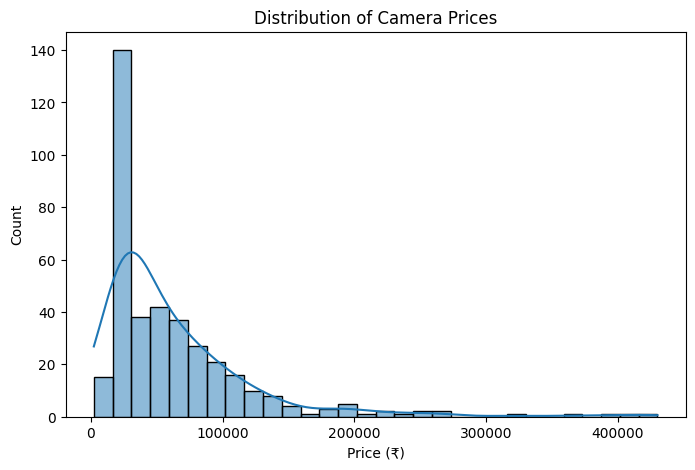

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price in India'], bins=30, kde=True)
plt.title("Distribution of Camera Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.show()


<b>Brand Distribution</b>

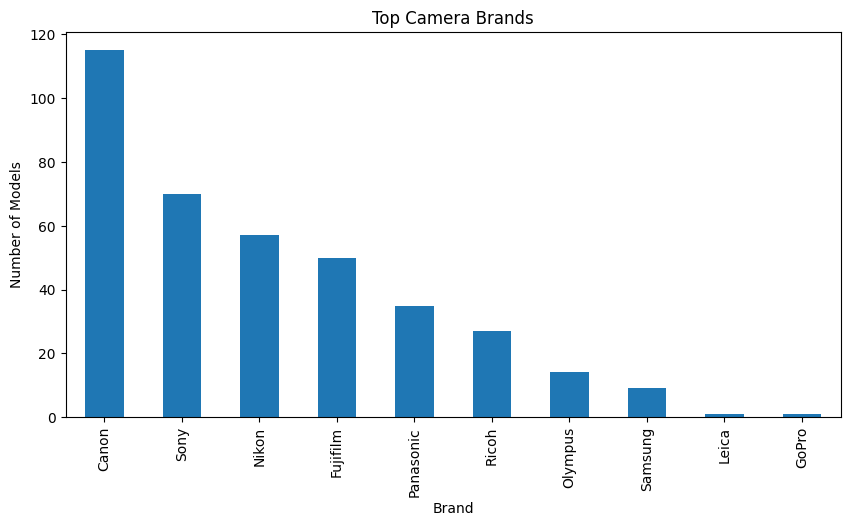

In [24]:
plt.figure(figsize=(10,5))
df['Brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top Camera Brands")
plt.xlabel("Brand")
plt.ylabel("Number of Models")
plt.show()


<b>Price vs Average Rating</b>

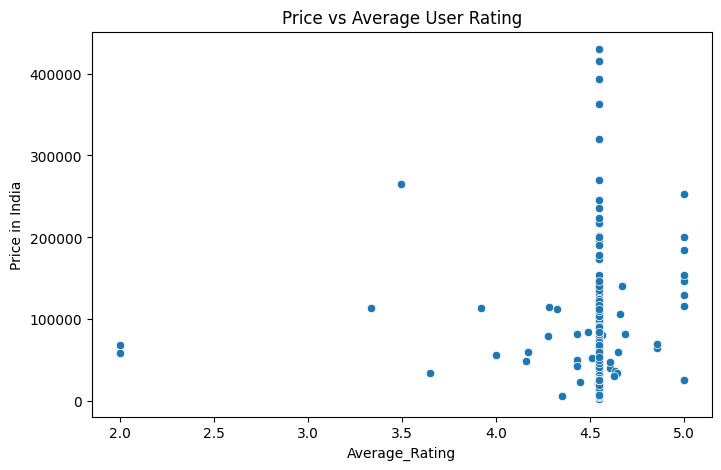

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Average_Rating', y='Price in India', data=df)
plt.title("Price vs Average User Rating")
plt.show()


<b>Price Category Distribution</b>

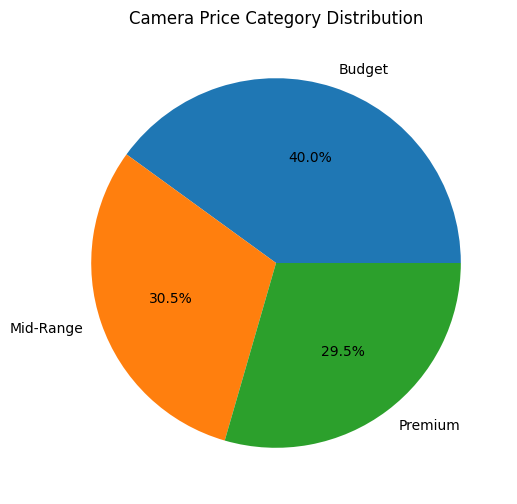

In [26]:
df['Price_Category'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6)
)
plt.title("Camera Price Category Distribution")
plt.ylabel("")
plt.show()


<b>Correlation Heatmap (Numerical Features)</b>

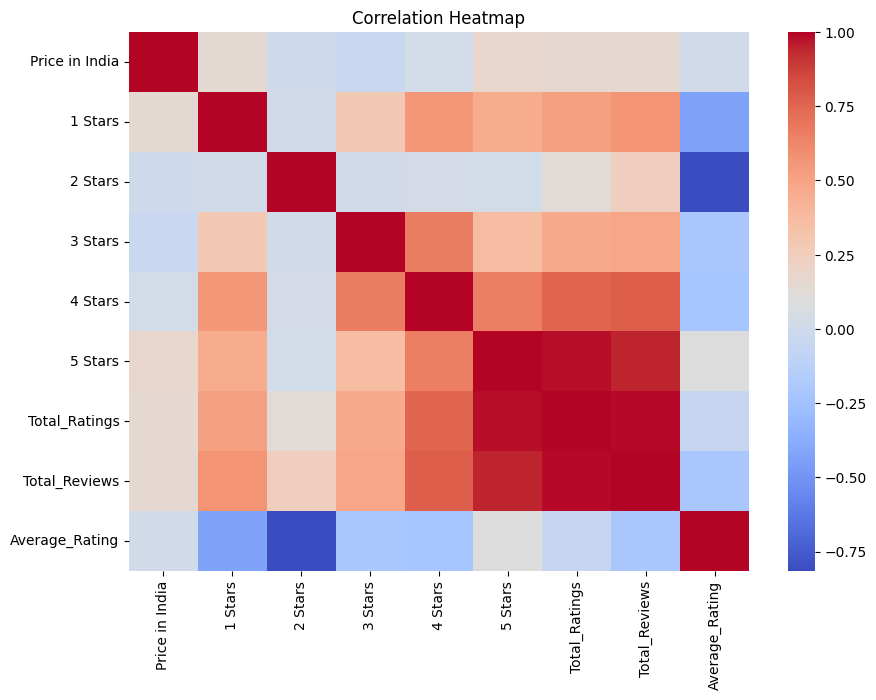

In [27]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<h4><b>9: Encode Categorical Columns</b></h4>

In [28]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


<h4><b>10: REGRESSION – Price Prediction</b></h4>

In [29]:
X = df.drop(['Price in India', 'Price_Category'], axis=1)
y = df['Price in India']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<b>Linear Regression</b>

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R2: 0.017667569357050605
Linear Regression RMSE: 61815.86051811582


<b>Random Forest Regression</b>

In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R2: 0.16369893822047266
Random Forest RMSE: 57036.38637649325


<h4><b>11: Feature Importance</b></h4>

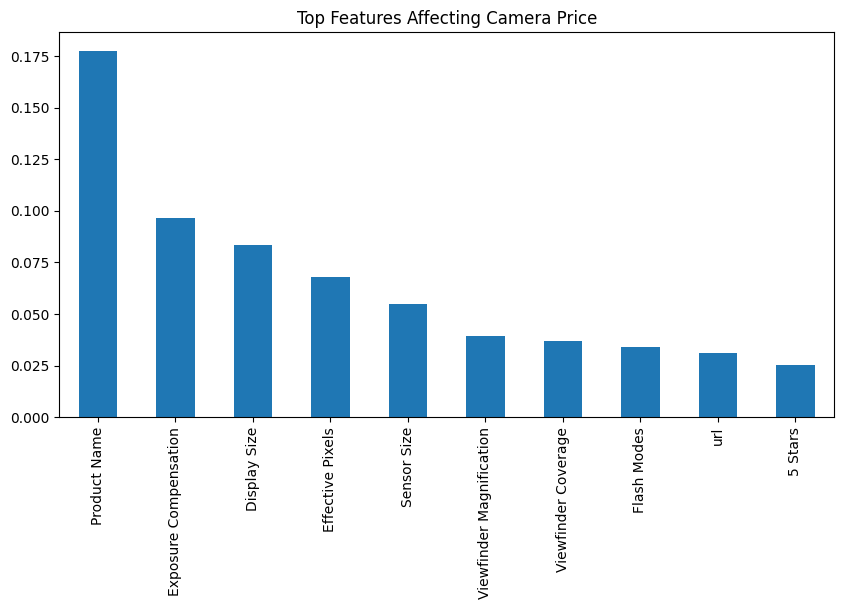

In [32]:
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top Features Affecting Camera Price")
plt.show()


<h4><b>12: CLASSIFICATION – Price Category</b></h4>

In [33]:
X_cls = df.drop(['Price in India', 'Price_Category'], axis=1)
y_cls = df['Price_Category']

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6052631578947368
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.44      0.44      0.44        25
           2       0.65      0.54      0.59        24

    accuracy                           0.61        76
   macro avg       0.60      0.60      0.60        76
weighted avg       0.60      0.61      0.60        76



<h4><b>13: Final Conclusion</b></h4>

Camera prices are strongly influenced by brand, sensor specifications, and ratings.
- Premium cameras form a smaller but high-value market segment.
- Feature engineering using star ratings significantly improved model quality.
- Random Forest models performed better due to complex non-linear relationships.
- This project demonstrates real-world data cleaning, EDA, feature engineering,
  regression, and classification skills.